In [ ]:
#Question-1

In [17]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

from astroML.resample import bootstrap
from astroML.stats import sigmaG

0.012533141373155003


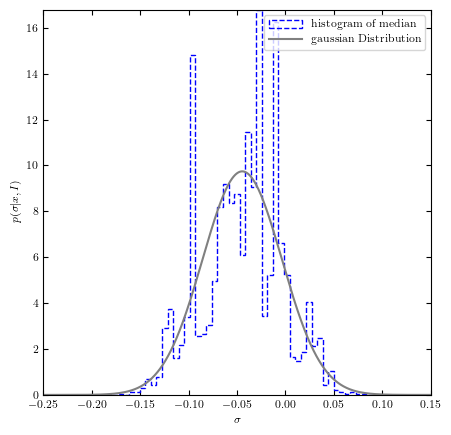

In [18]:
m = 1000  # number of points
n = 10000  # number of bootstraps

#------------------------------------------------------------
# sample values from a normal distribution
np.random.seed(123)
data = norm(0, 1).rvs(m)

#------------------------------------------------------------
# Compute bootstrap resamplings of data
mu1_bootstrap = bootstrap(data, n,  np.median, kwargs=dict(axis=1))
# mu2_bootstrap = bootstrap(data, n, sigmaG, kwargs=dict(axis=1))

#------------------------------------------------------------
# Compute the theoretical expectations for the two distributions
x = np.linspace(-0.25, 0.15, 1000)

sigma1 = np.sqrt(np.pi/(2*n))
print(sigma1)

gaussian_mean=np.mean(mu1_bootstrap)
gaussian_std=np.std(mu1_bootstrap)
pdf1=norm(gaussian_mean,gaussian_std).pdf(x)


#------------------------------------------------------------
# Plot the results
fig, ax = plt.subplots(figsize=(5, 5))

ax.hist(mu1_bootstrap, bins=50, density=True, histtype='step',
        color='blue', ls='dashed', label='histogram of median')
ax.plot(x, pdf1, color='gray',label='gaussian Distribution')

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$p(\sigma|x,I)$')

ax.legend()
plt.show()


In [ ]:
#Ques-2

In [65]:
x=[203,58,210,202,198,158,165,201,157,131,166,160,186,125,218,146]
x=np.array(x)

In [66]:
y=[495,173,479,504,510,416,393,442,317,311,400,337,423,334,533,344]
y=np.array(y)

In [67]:
sigma_y=[21,15,27,14,30,16,14,25,52,16,34,31,42,26,16,22]
sigma_y=np.array(sigma_y)

In [68]:
print(x)
print(y)
print(sigma_y)

[203  58 210 202 198 158 165 201 157 131 166 160 186 125 218 146]
[495 173 479 504 510 416 393 442 317 311 400 337 423 334 533 344]
[21 15 27 14 30 16 14 25 52 16 34 31 42 26 16 22]


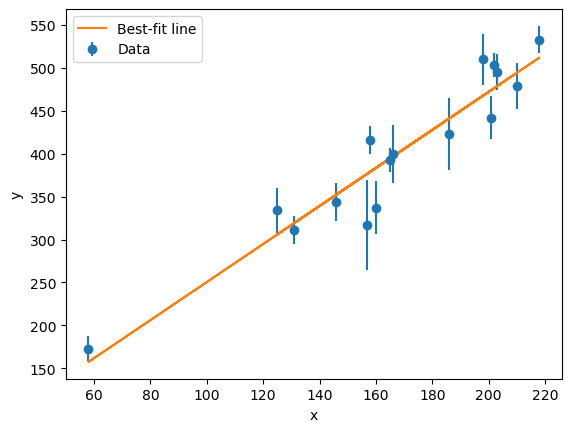

Standard uncertainty on the slope of the line: 0.04838899281730518


In [70]:
from scipy.stats import linregress
# Perform the linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the standard uncertainty variance on the slope of the line
sigma_m = std_err / np.sqrt(len(x))
# Plot the data points and the best-fit line
plt.errorbar(x, y, yerr=sigma_y, fmt='o', label='Data')
plt.plot(x, slope*np.array(x) + intercept, '-', label='Best-fit line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("Standard uncertainty on the slope of the line:", sigma_m)

In [47]:
#ques-3

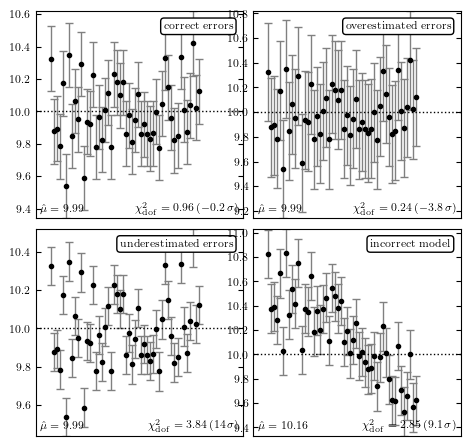

In [13]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

# Generate Dataset
np.random.seed(1)
N = 50
L0 = 10
dL = 0.2
t = np.linspace(0, 1, N)
L_obs = np.random.normal(L0, dL, N)
# Plot the results
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.05,
 bottom=0.1, top=0.95, hspace=0.05)
y_vals = [L_obs, L_obs, L_obs, L_obs + 0.5 - t ** 2]
y_errs = [dL, dL * 2, dL / 2, dL]
titles = ['correct errors',
 'overestimated errors',
 'underestimated errors',
 'incorrect model']

chi2s=[]
chi2dofs=[]

for i in range(4):
    ax = fig.add_subplot(2, 2, 1 + i, xticks=[])
    # compute the mean and the chi^2/dof
    mu = np.mean(y_vals[i])
    z = (y_vals[i] - mu) / y_errs[i]
    chi2 = np.sum(z ** 2)
    chi2s.append(chi2)
    chi2dof = chi2 / (N - 1)
    chi2dofs.append(chi2dof)
    # compute the standard deviations of chi^2/dof
    sigma = np.sqrt(2. / (N - 1))
    nsig = (chi2dof - 1) / sigma
    # plot the points with errorbars
    ax.errorbar(t, y_vals[i], y_errs[i], fmt='.k', ecolor='gray', lw=1)
    ax.plot([-0.1, 1.3], [L0, L0], ':k', lw=1)
    # Add labels and text
    ax.text(0.95, 0.95, titles[i], ha='right', va='top',
     transform=ax.transAxes,
     bbox=dict(boxstyle='round', fc='w', ec='k'))
    ax.text(0.02, 0.02, r'$\hat{\mu} = %.2f$' % mu, ha='left', va='bottom',
     transform=ax.transAxes)
    ax.text(0.98, 0.02,
     r'$\chi^2_{\rm dof} = %.2f\, (%.2g\,\sigma)$' % (chi2dof, nsig),
     ha='right', va='bottom', transform=ax.transAxes)


In [19]:
#set axis limits
ax.set_xlim(-0.05,1.05)
ax.set_xlim(8.6,11.4)

#set ticks and labels
ax.yaxis.set_major_locator(plt.MultipleLocator(1))

if i>1:
    ax.set_xlabel('observations')
if i%2==0:
    ax.set_label('Luminosity')
else:
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    
plt.show()
print('Chi squares DOF values \n',chi2dofs)
print('p values are \n', np.array(1)-stats.chi2(chi2dofs).cdf(chi2s))

Chi squares DOF values 
 [0.9592891608441547, 0.23982229021103868, 3.837156643376619, 2.847675397709133]
p values are 
 [6.36735109e-12 6.63208859e-05 0.00000000e+00 0.00000000e+00]
